<a href="https://colab.research.google.com/github/AnkammaMaddineni/Maddineni_INFO5502_Summer2022/blob/main/INFO_5502_Final_Exam_Summer_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### INFO 5502 Final Exam (05/12/2022, 500 points in total)

<span style='background:yellow'>**Question 1 (100 pt).**</span> We want to create a birthday frequency graph using the data on births in the United States, provided by the Centers for Disease Control (CDC). You can download the data from my GitHub link:https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/births.csv 

Please visualize the data as the following figure using python (you can use any data visualization packages):



In [145]:
#### You code here

#Importing required modules

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from datetime import date

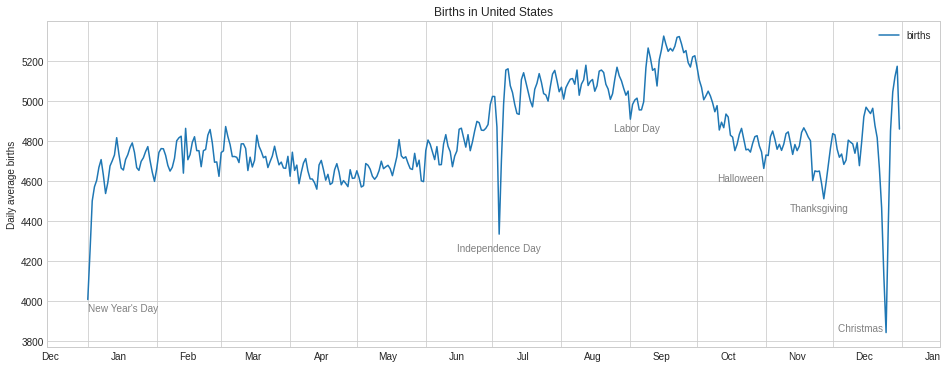

In [146]:

births = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/births.csv")

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')

births_by_date = births.pivot_table('births', [births.index.month, births.index.day])

births_by_date.index = [date(2012, month, day)
                        for (month, day) in births_by_date.index]

fig, ax = plt.subplots(figsize=(16, 6))
births_by_date.plot(ax=ax)

style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

#Adding title and axis labels

ax.set(title='Births in United States',
       ylabel='Daily average births')

plt.style.use('seaborn-whitegrid')
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));


<span style='background:yellow'>**Question 2 (100 pt).**</span> Write a python program to evaluate the text classification performance using accuracy, precision, recall, and f1 score. 

Accuracy = (TP + TN) / (TP+ TN+ FP+ FN)

Recall = (TP) / (TP+FN)

Precision = (TP) / (TP+FP)

F1 Score = (2*Precision*Recall) / (Precision + Recall)

Here is the confusion matrix of a text classfication task (six categories) on the testing data. 



In [147]:
#### You code here

cm= [[157,46,25,22,15,3],
     [28,151,45,18,1,6],
     [11,38,135,14,3,7],
     [11,15,18,70,6,4],
     [14,12,14,7,56,2],
     [12,7,6,5,5,16]]
     
sum_confusion_matrix= sum(sum(cm,[])) 

for i in range(0,6):
  TP= cm[i][i]
  FP= cm[0][i]+ cm[1][i]+ cm[2][i]+  cm[3][i]+cm[4][i]+ cm[5][i] -  cm[i][i]
  FN=cm[i][0]+ cm[i][1]+ cm[i][2]+  cm[i][3]+cm[i][4]+ cm[i][5] -  cm[i][i]
  TN= sum_confusion_matrix-TP-FN-FP

  Accuracy= (TP + TN) / (TP+ TN+ FP+ FN)
  Recall= (TP) / (TP+FN)
  Precision= (TP) / (TP+FP)
  f1Score = (2*Precision*Recall) / (Precision + Recall)

  print("Accuracy for category {} = {}".format(i, Accuracy))
  print("Recall for category {} = {}".format(i,  Recall))
  print("Precision for category {} = {}".format(i,  Precision))
  print("F1 Score for category {} = {}".format(i,  f1Score))
  print("\n")




Accuracy for category 0 = 0.8139303482587065
Recall for category 0 = 0.585820895522388
Precision for category 0 = 0.6738197424892703
F1 Score for category 0 = 0.626746506986028


Accuracy for category 1 = 0.7850746268656716
Recall for category 1 = 0.606425702811245
Precision for category 1 = 0.5613382899628253
F1 Score for category 1 = 0.583011583011583


Accuracy for category 2 = 0.8199004975124378
Recall for category 2 = 0.6490384615384616
Precision for category 2 = 0.5555555555555556
F1 Score for category 2 = 0.598669623059867


Accuracy for category 3 = 0.8805970149253731
Recall for category 3 = 0.5645161290322581
Precision for category 3 = 0.5147058823529411
F1 Score for category 3 = 0.5384615384615384


Accuracy for category 4 = 0.9213930348258706
Recall for category 4 = 0.5333333333333333
Precision for category 4 = 0.6511627906976745
F1 Score for category 4 = 0.5863874345549738


Accuracy for category 5 = 0.9432835820895522
Recall for category 5 = 0.3137254901960784
Precision fo

<span style='background:yellow'>**Question 3 (200 pt).**</span> 

Part A: Given Inetd dataset, an intrusion detection dataset that contains 2 columns. The first column represents a process ID number (PID) and the second column represents a system call. The goal is to extract the entire system call sequence by its PID, then tokenize and parse each sequence into 25-grams. After this, we’ll split the data into training and testing sets. Next, we ensure data quality in the training dataset by removing duplicate sequences within each class and overlapped sequences between both classes. To ensure a fair evaluation, we also clean the testing set by repeating the previous step. You will implement a Decision Tree model to train and test on the training set and testing set that we just clean. 


Part B: As the data type is sequential, we want to know how similar the sequences from both classes are and visualize how the similarity scores vary in different sequence lengths. Compute a cosine similarity score of 100 random pairs from both classes and get a median cosine similarity. Repeat this step in different sequence lengths (5, 10, 15, and 20). Plot a line chart to visualize how the median cosine similarities vary through sequence lengths of 5 to 25. 

You can download the datasets from github: https://github.com/unt-iialab/info5502-spring2022/tree/main/finalexam/q4


Step by step instructions and questions:

(1)(30 points) Attached are the Normal and Intrusion data folders. Read in the data and store them in two separate dataframes. Combine the system calls (the second column) from the same PID (the first column) into a sequence or a string. 

(2)(30 points) Parse an entire sequence into smaller sequences of size 25. (Hint: Use word_tokenize and ngrams from nltk library to parse).

(3)(30 points) Add labels to the data, and partition the labeled data into training data and testing data with a ratio of 70/30.

(4)(30 points) As the dataset has a lot of duplicate sequences, make sure that the testing data only contain unique sequences and that these sequences do not exist in the training data. Condense training data and testing data into two sets. Take the difference between the testing set and training set to remove the overlapped sequences from the testing data. 

(5)(30 points) The sequences from each class can be repetitive, and some of these sequences may have different labels. Therefore, we need to remove the duplicate sequences within each class and the overlapped sequences from the Intrusion class. Start out by separating the Normal class and Intrusion class in both training and testing data. Use the same concept in Question 4 to remove duplicate sequences and overlapped sequences from the training data.


(6)(50 points) Bootstrap the training data to get the same number of sequences from each class. Train and evaluate a Decision Tree model using the training data and testing data that we just clean. How is the performance?


In [148]:
#### You code here

#Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.util import ngrams
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import statistics

In [149]:
int_data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-intrusion.int", sep = " ", header = None)
n_data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-normal.int", sep = " ", header = None)
int_data.columns = ['PID', 'SystemCalls']
n_data.columns = ['PID', 'SystemCalls']
print(int_data.head(2))
print()
print(n_data.head(2))

   PID  SystemCalls
0  167           90
1  167          125

   PID  SystemCalls
0  167           90
1  167          125


In [150]:
print(int_data.shape)
print(n_data.shape)

(8371, 2)
(541, 2)


In [151]:
intrusion_dict = {}
n_dict = {}
for pid in list(set(int_data['PID'].values)):
    intrusion_dict[pid] = " ".join(str(value) for value in list(int_data[int_data['PID'] == pid]['SystemCalls'].values))

for pid in list(set(n_data['PID'].values)):
    n_dict[pid] = " ".join(str(value) for value in list(n_data[n_data['PID'] == pid]['SystemCalls'].values))

intrusion_dict[167]

'90 125 125 106 5 90 6 5 3 90 90 90 90 6 125 91 125 125 125 136 49 24 47 50 45 45 5 106 106 106 106 106 2 1'

In [152]:
intrusion_list = []
n_list = []

for key in intrusion_dict.keys():
    a = intrusion_dict[key]
    tokens = [token for token in a.split(" ") if token != ""]
    
    for ele in list(ngrams(tokens, 25)):
        intrusion_list.append(ele)
        
for key in n_dict.keys():
    a = n_dict[key]
    tokens = [token for token in a.split(" ") if token != ""]
    
    for ele in list(ngrams(tokens, 25)):
        n_list.append(ele) 

print(len(intrusion_list))
print(len(n_list))

7627
469


In [153]:
intrusion_df = pd.DataFrame(intrusion_list)
n_df = pd.DataFrame(n_list)
intrusion_df['class'] = 1
n_df['class'] = 0
print(intrusion_df.shape)
print(n_df.shape)

(7627, 26)
(469, 26)


In [154]:
comb_df = pd.DataFrame()
comb_df = comb_df.append(intrusion_df)
comb_df = comb_df.append(n_df)
print(comb_df.shape)

(8096, 26)


In [155]:
comb_df = comb_df.drop_duplicates(subset = comb_df.columns[:-1], keep = 'last')
comb_df.shape

(333, 26)

In [156]:
comb_df['class'].value_counts()

1    177
0    156
Name: class, dtype: int64

In [157]:
comb_df.columns[:-1]

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24],
      dtype='object')

In [158]:

c = comb_df.drop("class", axis = 1)
d = comb_df['class']
c_train, c_valid, d_train, d_valid = train_test_split(c, d, test_size = 0.2, random_state = 0)
dtclassifier = DecisionTreeClassifier(max_depth = 10)
dtclassifier.fit(c_train, d_train)
d_pred = dtclassifier.predict(c_valid)
print(classification_report(d_valid,d_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.91      0.87      0.89        45

    accuracy                           0.85        67
   macro avg       0.83      0.84      0.83        67
weighted avg       0.86      0.85      0.85        67



In [159]:

cosine_similar_ngram = {}

for ngram in range(5, 26, 5):

    intrusion_data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-intrusion.int", sep = " ", header = None)
    normal_data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-normal.int", sep = " ", header = None)

    intrusion_data.columns = ['PID', 'SystemCalls']
    normal_data.columns = ['PID', 'SystemCalls']

    intrusion_dict = {}
    normal_dict = {}
    
    for pid in list(set(intrusion_data['PID'].values)):
        intrusion_dict[pid] = " ".join(str(value) for value in list(intrusion_data[intrusion_data['PID'] == pid]['SystemCalls'].values))

    for pid in list(set(normal_data['PID'].values)):
        normal_dict[pid] = " ".join(str(value) for value in list(normal_data[normal_data['PID'] == pid]['SystemCalls'].values))

    intrusion_list = []
    normal_list = []
    for key in intrusion_dict.keys():
        s = intrusion_dict[key]
        tokens = [token for token in s.split(" ") if token != ""]

        for ele in list(ngrams(tokens, ngram)):
            intrusion_list.append(ele)

    for key in normal_dict.keys():
        s = normal_dict[key]
        tokens = [token for token in s.split(" ") if token != ""]

        for ele in list(ngrams(tokens, ngram)):
            normal_list.append(ele)

    intrusion_df = pd.DataFrame(intrusion_list)
    normal_df = pd.DataFrame(normal_list)

    intrusion_df['class'] = 1
    normal_df['class'] = 0

    combined_df = pd.DataFrame()

    combined_df = combined_df.append(intrusion_df)
    combined_df = combined_df.append(normal_df)


    combined_df = combined_df.drop_duplicates(subset = combined_df.columns[:-1], keep = 'last')
    

    from sklearn.metrics.pairwise import cosine_similarity
    import statistics

    similarities_list = []
    for i in range(0, 100):
        list1 = list(combined_df[combined_df['class'] == 0].sample(n = 1).iloc[0, :].values)
        list2 = list(combined_df[combined_df['class'] == 1].sample(n = 1).iloc[0, :].values)
        try:
            similarities_list.append(cosine_similarity([list1], [list2]))
        except Exception as e:
            print(e)
            print(list1, list2)

    print(ngram, statistics.median(similarities_list)[0][0])
    print()
    cosine_similar_ngram[ngram] = statistics.median(similarities_list)[0][0]

5 0.8058940515880082

10 0.7371990400610426

15 0.7044256485698682

20 0.7183495297392285

25 0.724271964870211



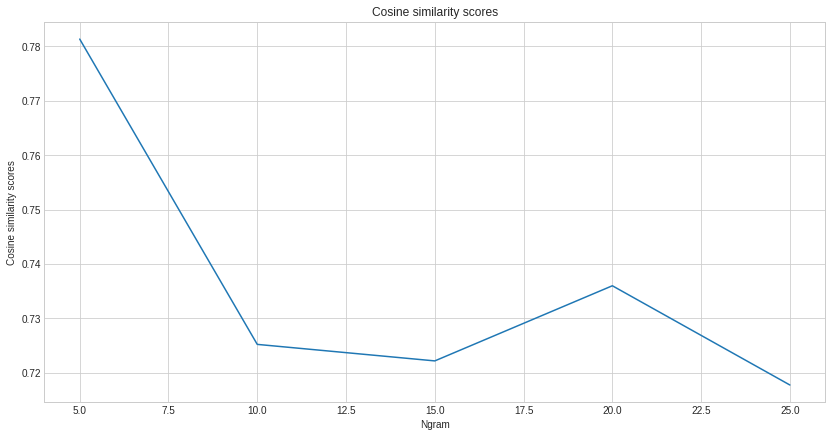

In [129]:
cosine_similar_ngram_df = pd.DataFrame({"Ngram":list(cosine_similar_ngram.keys()), "Similarity_scores": list(cosine_similar_ngram.values())})
plt.rcParams['figure.figsize'] = [14, 7]
sns.lineplot(x = "Ngram", y = "Similarity_scores", data = cosine_similar_ngram_df)
plt.title("Cosine similarity scores")
plt.xlabel("Ngram")
plt.ylabel("Cosine similarity scores")
plt.show()

<span style='background:yellow'>**Question 4 (100 pt).**</span> In the world of business, the importance of the customers’ reviews for any product is not ignorable. The impact of customers’ reviews on customer’s decision making is significant. Therefore, businesses try to increase this impact by increasing the ratio of the positive reviews to negative reviews. One effective way to increase the ratio is offering the incentives such as small gifts or free next services to customers to post the reviews for item they purchase or used. However, it is not always the case, and customer may post their reviews without receiving or accepting the incentives. So, the reviews could be in either incentivized or non-incentivized category.


Considering the importance of reviews, in this question you need to compare these two categories of reviews. One method to compare the effectiveness of two categories is conducting the A/B testing.


The Software_Reviews dataset is collected from software review products, and it is combination of several small datasets. Find the dataset as an attachment on the left side of the page.


You can downlaod the dataset from github: https://github.com/unt-iialab/info5502-spring2022/blob/main/finalexam/Software_Reviews_csv_files_S.csv

(1)(50 points) Clean the dataset before you use (You need to know this dataset is combinations of the several CSV files with title rows. So, there are extra title rows in the middle of the file, which they need to be removed.)


(2)(50 points) Apply an A/B test": consider the “incentivized” column as main column for A & B groups.

a. The “incentivized” column includes ‘NominalGift’, ‘VendorReferredIncentivized’, ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’, ‘None’

b. Group A (Incentive): ‘NominalGift’, and ‘VendorReferredIncentivized’

c. Group B (NoIncentive): ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’

d. Make the decision if ‘None’ includes in either Group A or B or remove that.

e. The “OverAllRating” is another column that is used to compare groups A and B.

Which one A or B group has higher “OverAllRating”?

In [130]:
#### You code and your answer here here

data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/Software_Reviews_csv_files_S.csv")

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math as m

In [131]:
data = data[data['id'] != 'id']
data.shape

(2988, 28)

In [132]:
group_a = data[(data['incentivized'] == "NominalGift") | (data['incentivized'] == "VendorReferredIncentivized")]['OverAllRating']
group_b = data[(data['incentivized'] == "NoIncentive") | (data['incentivized'] == "NonNominalGift") | (data['incentivized'] == "VendorReferred")]['OverAllRating']

shape_a = group_a.shape[0]
shape_b = group_b.shape[0]

print(shape_a)
print(shape_b)

alpha = 0.05

mu_con = np.mean(group_a)
mu_exp = np.mean(group_b)

y1 = group_a.astype('float64')
variance_con = np.var(y1)
print(variance_con)

y2 = group_b.astype('float64')
variance_exp = np.var(y2)

1015
1306
0.7380193647018857


In [ ]:
pooled_variance = m.sqrt(variance_con/shape_a + variance_exp/shape_b)

T = (mu_con-mu_exp)/m.sqrt(variance_con/shape_a + variance_exp/shape_b)

p_value = norm.sf(T)*2

Z_crit  = norm.ppf(1-alpha/2)

m = Z_crit*pooled_variance

CI = [(mu_con - mu_exp) - m, (mu_con - mu_exp) + m]


In [134]:
print("Test Statistics stat: ", T)
print("Z-critical: ", Z_crit)
print("P_value: ", p_value)
print("Confidence Interval of 2 sample Z-test for proportions: ", np.round(CI,2))

Test Statistics stat:  nan
Z-critical:  1.959963984540054
P_value:  nan
Confidence Interval of 2 sample Z-test for proportions:  [nan nan]


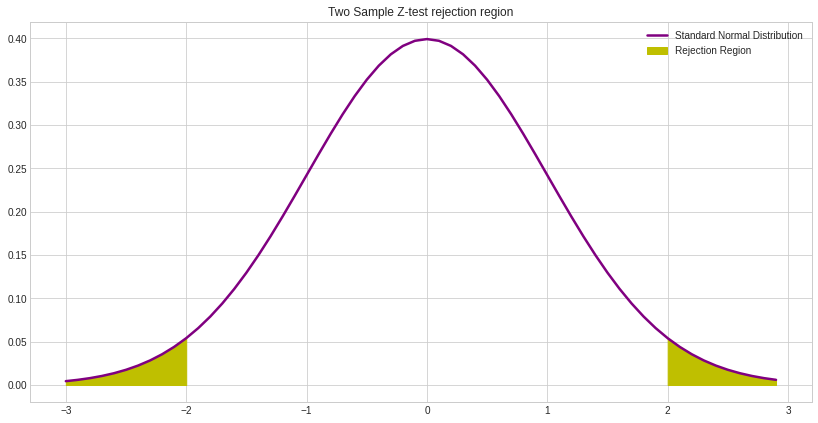

In [135]:
import matplotlib.pyplot as plt
z = np.arange(-3,3,  0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'purple',linewidth = 2.5)
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label = 'Rejection Region',color ='y' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), color ='y' )
plt.title("Two Sample Z-test rejection region")
plt.legend()
plt.show()